In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv("02_Churn_rate.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4478,0988-JRWWP,Female,0,No,No,3,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,54.20,140.4,No
5548,4589-IUAJB,Male,0,Yes,No,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.25,1724.15,No
3641,0487-CRLZF,Female,0,No,No,49,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.45,3721.9,No
2182,2530-FMFXO,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,103.20,5873.75,No
516,3482-ABPKK,Female,0,No,No,28,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,54.30,1546.3,No


In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

### Dropping unwanted columns

In [5]:
df.drop('customerID', axis='columns', inplace=True)

## Checking and Changing the dtypes

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# pd.to_numeric(df.TotalCharges) gnerates an error because the clumn contains ' ' values 

### Exploring "TotalCharges" where value is not numeric data type 

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Selecting only those rows in the dataframe where the 'TotalCharges' values are not null and storing them in a new dataframe df1.

In [9]:
df1 = df[df.TotalCharges != " "]
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Changing column "TotalCharges" to numeric data type 

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\users\skudt\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Visualizing DataFrame with respect  to columns 'tenure' and 'MonthlyCharges'

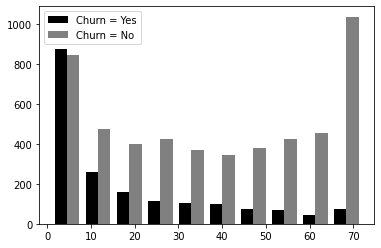

In [12]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['black', 'grey'], label=['Churn = Yes', 'Churn = No'])
plt.legend()

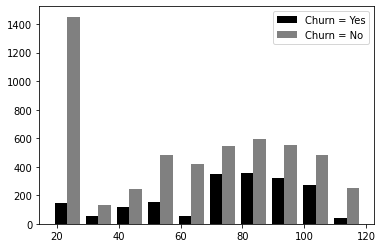

In [13]:
monthly_charges_no = df1[df1.Churn == 'No'].MonthlyCharges
monthly_charges_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([monthly_charges_yes, monthly_charges_no], color=['black', 'grey'], label=['Churn = Yes', 'Churn = No'])
plt.legend()

### A utility function to print the unique values in a column

In [14]:
def print_unique_column_values(df):
    for c in df:
        if df[c].dtypes == 'object':
            print('{} = {}'.format(c, df[c].unique()))

In [15]:
print_unique_column_values(df1)

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


### Replacing redundant values 

In [16]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
# .replace('replace what?', 'with what?', inplace=True)

c:\users\skudt\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Aim here is to convert all the column values to 'Yes' or 'No'

In [17]:
print_unique_column_values(df1)

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


### Converting values such that the dataset can be fit into the model

In [18]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'PaperlessBilling', 'Churn']


for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

c:\users\skudt\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
print_unique_column_values(df1)

gender = ['Female' 'Male']
InternetService = ['DSL' 'Fiber optic' 'No']
Contract = ['Month-to-month' 'One year' 'Two year']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [21]:
df1.Churn.unique()

array([0, 1], dtype=int64)

### 'gender' column goes through the same procedure

In [22]:
df1['gender'].replace({'Female': 1, 'Male':0}, inplace=True)

### Transforming following column to one-hot encoded ones

In [23]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [24]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,0,0,0,0,1


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Scaling values in columns 'tenure', 'MonthlyCharges' and 'TotalCharges' between 0 to 1

In [26]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,1,0,1,0,0,0,0,0,1


### Selecting X and y

In [27]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [29]:
X_train.shape

(5274, 26)

### Creating and training our model

In [30]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
    
)

In [31]:
# model.evaluate(X_test, y_test)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 2s 3ms/step - loss: 0.5630 - accuracy: 0.7207
Epoch 2/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4515 - accuracy: 0.7669
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4371 - accuracy: 0.7849
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4365 - accuracy: 0.7909
Epoch 5/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.7978
Epoch 6/100
165/165 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8024
Epoch 7/100
165/165 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.7897
Epoch 8/100
165/165 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.7989
Epoch 9/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8055
Epoch 10/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4123 - accura

165/165 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8129
Epoch 82/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8233
Epoch 83/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8165
Epoch 84/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3644 - accuracy: 0.8254
Epoch 85/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.8240
Epoch 86/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8190
Epoch 87/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3697 - accuracy: 0.8182
Epoch 88/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3778 - accuracy: 0.8190: 0s - loss: 0.3852 - 
Epoch 89/100
165/165 [==============================] - 1s 3ms/step - loss: 0.3654 - accuracy: 0.8302
Epoch 90/100
165/165 [==============================] - 1s 3ms/step - los

In [34]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8117


[0.42597272992134094, 0.8117178678512573]

In [35]:
y_predicted = model.predict(X_test)
y_predicted[:5]

array([[0.00064381],
       [0.13002823],
       [0.45418268],
       [0.6188493 ],
       [0.23560713]], dtype=float32)

In [36]:
y_test[:10]

179     0
2544    0
2140    1
2504    1
2526    1
835     0
455     0
78      0
1353    0
5145    0
Name: Churn, dtype: int64

In [37]:
y_pred = []

for element in y_predicted:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

# Classification Report and Confusion Matrix 

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1299
           1       0.66      0.56      0.61       459

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.81      1758



Text(69.0, 0.5, 'Truth')

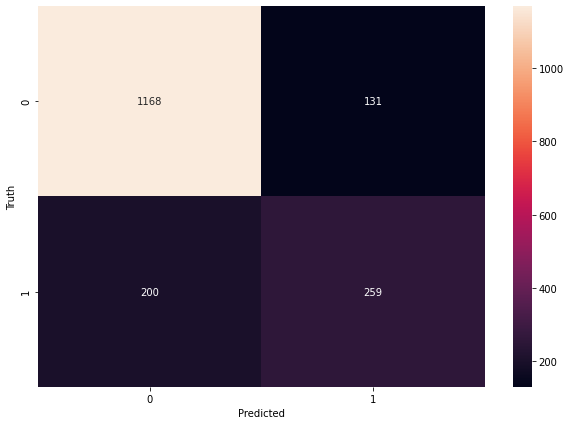

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')